# CKAマトリクスの可視化

## CSVファイルから

In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

def plot_cka(csv_path, ax=None, cmap="coolwarm", vmin=0, vmax=1, title=None, cbar=False):
    """
    1つのCKA CSVファイルをヒートマップとして描画する関数。

    Parameters
    ----------
    csv_path : str
        CKA行列を格納したCSVファイルのパス
    ax : matplotlib.axes.Axes, optional
        描画先のAxes（指定しない場合は新規作成）
    cmap : str
        カラーマップ（例: "viridis", "coolwarm"）
    vmin, vmax : float
        カラースケールの範囲（CKA値に合わせて0〜1を指定するのが一般的）
    title : str
        サブタイトルやエポック番号など
    """
    # === CSVをDataFrameとして読み込み ===
    df = pd.read_csv(csv_path, header=0)
    
    # === 描画先のAxes設定 ===
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 5))
    
    # === ヒートマップ + カラーバー付き ===
    sns.heatmap(
        df,
        ax=ax,
        cmap=cmap,
        vmin=vmin,
        vmax=vmax,
        cbar=cbar,  # ← カラーバー表示
        cbar_kws={"label": "CKA similarity"}  # ← 凡例ラベル
    )
    
    # === y軸を反転 ===
    ax.invert_yaxis()

    # === 軸とタイトル ===
    ax.set_xlabel("Student Layer")
    ax.set_ylabel("Teacher Layer")
    if title:
        ax.set_title(title)
    else:
        ax.set_title(os.path.basename(csv_path))
    
    return ax


def plot_all_cka_in_folder(folder_path, max_cols=4):
    """
    指定フォルダ内のすべてのCKA CSVファイルをグリッド表示する関数。
    
    Parameters
    ----------
    folder_path : str
        CKA CSVファイル群があるディレクトリ
    max_cols : int
        一行あたりに並べるヒートマップの数
    """
    # === ファイル一覧取得 ===
    csv_files = sorted(glob.glob(os.path.join(folder_path, "cka_epoch_*.csv")))
    if not csv_files:
        print("No CSV files found in:", folder_path)
        return
    
    n = len(csv_files)
    ncols = min(max_cols, n)
    nrows = (n + ncols - 1) // ncols  # 行数を自動計算
    
    # === Figure作成 ===
    fig, axes = plt.subplots(nrows, ncols, figsize=(4*ncols, 4*nrows))
    axes = axes.flatten() if n > 1 else [axes]
    
    # === 各ファイルを順に描画 ===
    for i, csv_path in enumerate(csv_files):
        epoch_name = os.path.splitext(os.path.basename(csv_path))[0]
        plot_cka(csv_path, ax=axes[i], title=epoch_name)
    
    # === 余白調整 ===
    for j in range(i+1, len(axes)):
        axes[j].axis("off")  # 残りの空欄を非表示にする
    
    plt.tight_layout()
    plt.show()

def show_json_info(json_path, keys=None):
    """
    JSONファイルの内容を表示する関数。
    keys を None にすると全項目を表示。
    keys にリストを渡すと、その項目だけ表示。
    """
    try:
        with open(json_path, "r", encoding="utf-8") as f:
            data = json.load(f)
    except FileNotFoundError:
        print(f"[Error] File not found: {json_path}")
        return
    except json.JSONDecodeError:
        print(f"[Error] Invalid JSON format: {json_path}")
        return

    # print(f"=== {json_path} ===")

    # keysが指定されていない場合 → 全項目出力
    if keys is None:
        for key, value in data.items():
            print(f"{key}: {value}")
    else:
        # 指定されたキーのみ出力
        for key in keys:
            if key in data:
                print(f"{key}: {data[key]}")
            else:
                print(f"{key}: [キーが存在しません]")


In [2]:
import os
# ==== 基本ディレクトリ ====
base_dir = os.path.join("..", "save", "students", "models")

for i in (os.listdir(base_dir)):
    print("\"", i, "\"", ",", sep="")


"S_vgg16_bn-T_vgg16_bn-cifar10-trial_0-epochs_240-bs_64-ckad-cls_1.0-div_1.0-beta_1.0-20251020_092117",
"S_vgg16_bn-T_vgg16_bn-cifar10-trial_0-epochs_240-bs_64-kd-cls_1.0-div_1.0-beta_1.0-20251020_102340",
"S_vgg16_bn-T_vgg16_bn-cifar100-trial_0-epochs_240-bs_64-ckad-cls_1.0-div_1.0-beta_10.0-20251020_132022",
"S_vgg16_bn-T_vgg16_bn-cifar100-trial_0-epochs_240-bs_64-ckad-cls_1.0-div_1.0-beta_10.0-20251020_185856",
"S_vgg16_bn-T_vgg16_bn-cifar100-trial_0-epochs_240-bs_64-ckad-cls_1.0-div_1.0-beta_10.0-20251023_110635",
"S_vgg16_bn-T_vgg16_bn-cifar100-trial_0-epochs_240-bs_64-ckad-cls_1.0-div_1.0-beta_10.0-20251023_121226",
"S_vgg16_bn-T_vgg16_bn-cifar100-trial_0-epochs_240-bs_64-ckad-cls_1.0-div_1.0-beta_10.0-20251023_131941",
"S_vgg16_bn-T_vgg16_bn-cifar100-trial_0-epochs_240-bs_64-ckad-cls_1.0-div_1.0-beta_10.0-20251023_143449",
"S_vgg16_bn-T_vgg16_bn-cifar100-trial_0-epochs_240-bs_64-ckad-cls_1.0-div_1.0-beta_10.0-20251023_164110",
"S_vgg16_bn-T_vgg16_bn-cifar100-trial_0-epochs_240-b

distill: kd
layer_usage: key_layers


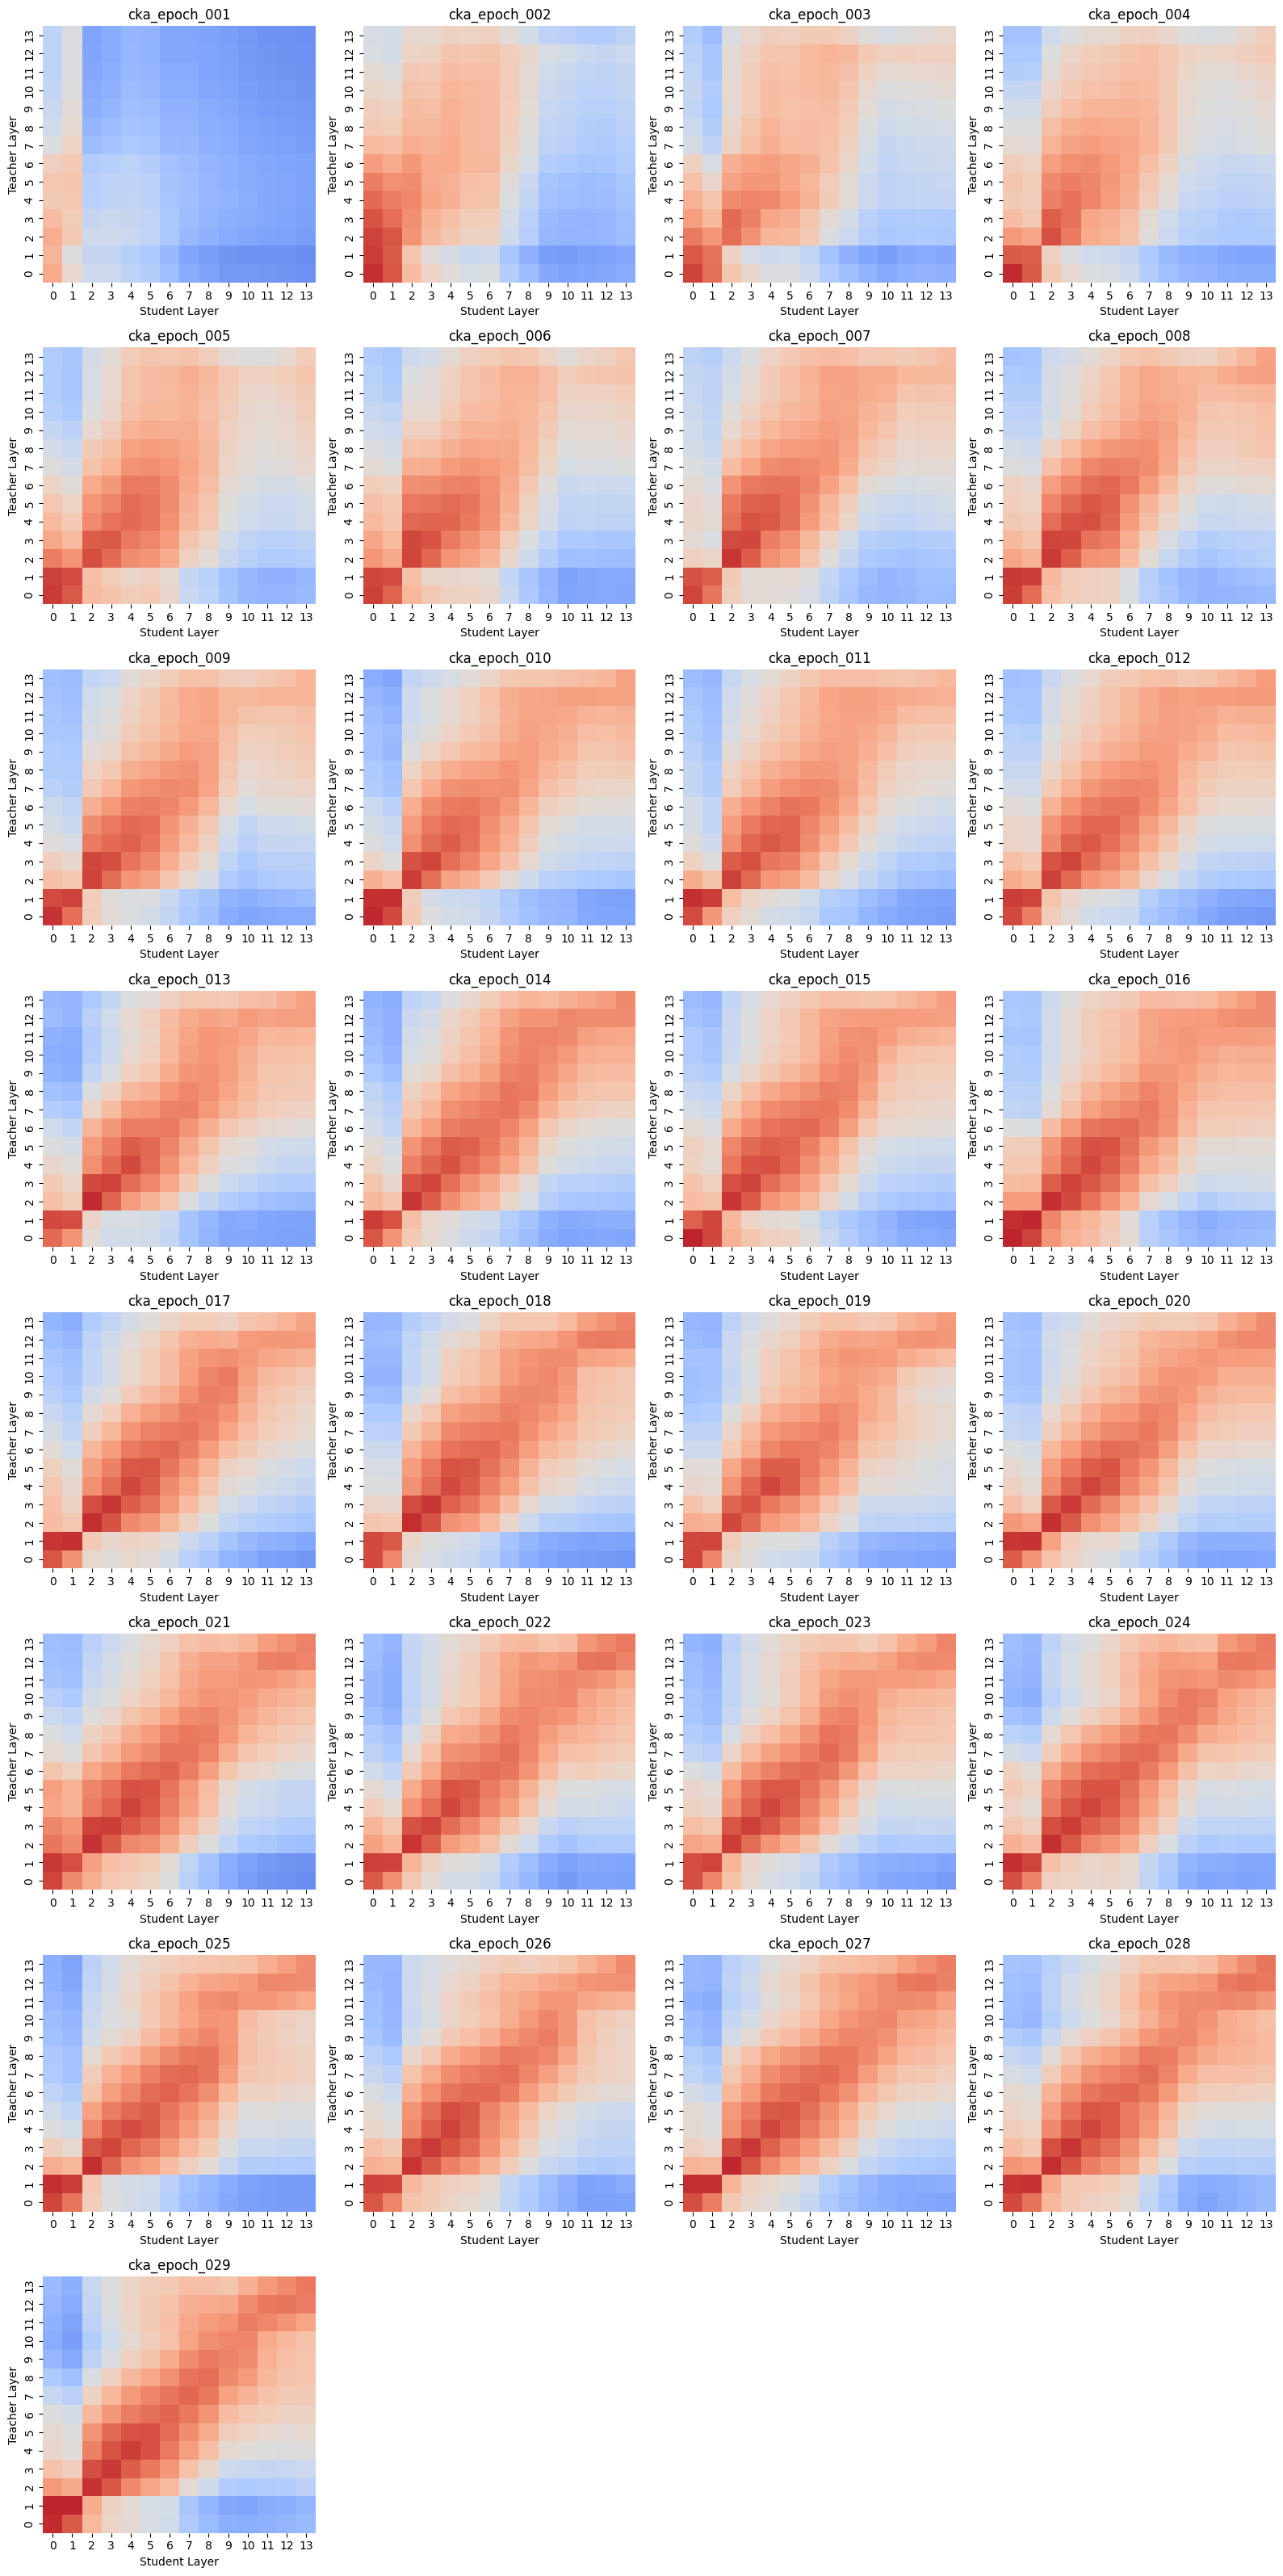

In [6]:
import os
base_dir = os.path.join("..", "save")

model_name = "S_vgg16_bn-T_vgg16_bn-cifar100-trial_0-epochs_240-bs_64-kd-cls_1.0-div_1.0-beta_10.0-20251023_202111"
cka_name = "cka_log_" + model_name

cka_dir = os.path.join(base_dir, "cka_logs", cka_name) # folder
json_path = os.path.join(base_dir, "students", "models", model_name, "parameters.json")

show_json_info(json_path, keys=["distill", "layer_usage"])
plot_all_cka_in_folder(cka_dir)

## モデルの推論結果から